In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Create the dataframe
data = {
    'AI Model': ['madd_6_Lazim', 'madd_246', 'madd_6', 'madd_2', 'Ikhfaa', 'Idgham', 'tafkhim', 'qalqala', 'imala'],
    'Version 1': [75.00, 100.00, 87.50, 97.50, 93.33, 94.83, 87.78, 98.75, 98.21 ],
    'Version 2': [4.58, 100.00, 94.17, 100.00, 85.42, 100.00, 86.25, 99.58, 7.50 ],
    'Version 3': [100.00, 98.44, 85.42, 100.00, 85.83, 94.83, 75.00, 98.75, 96.43 ],
    'Version 4': [100.00, 99.33, 95.00, 99.67, 99.00, 99.00, 80.00, 100.00, 12.33 ],
    'Version 5': [100.00, 98.75, 93.33, 100.00, 93.33, 91.72, 92.44, 98.00, 92.86],
}
df = pd.DataFrame(data)

In [3]:
# Set the AI Model column as the index
df.set_index('AI Model', inplace=True)

In [4]:
# Transpose the dataframe to have versions on the x-axis and models as different lines
df = df.transpose()

In [5]:
# Use seaborn to generate a color palette
palette = sns.color_palette("husl", len(df.columns))

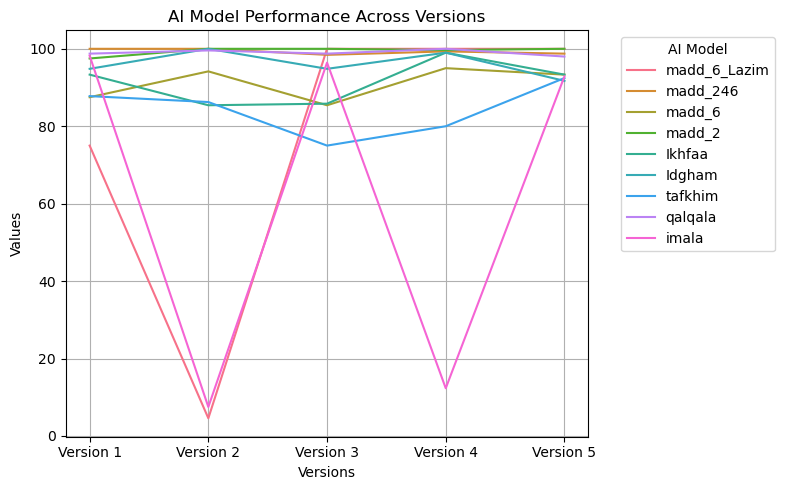

In [9]:
# Plot the data
plt.figure(figsize=(8, 5))
for color, column in zip(palette, df.columns):
    plt.plot(df.index, df[column], label=column, color=color)

# Customize the plot
plt.title('AI Model Performance Across Versions')
plt.xlabel('Versions')
plt.ylabel('Values')
plt.legend(title='AI Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

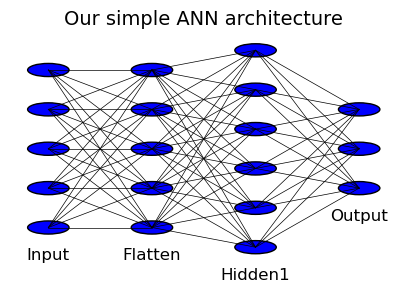

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_layer(ax, center, layer_size, layer_name, node_color='blue'):
    x_center, y_center = center
    node_spacing = 0.6
    layer_height = (layer_size - 1) * node_spacing

    for i in range(layer_size):
        node_y = y_center + i * node_spacing - layer_height / 2
        circle = patches.Circle((x_center, node_y), radius=0.1, edgecolor='black', facecolor=node_color)
        ax.add_patch(circle)

    ax.text(x_center, y_center - layer_height / 2 - 0.5, layer_name, ha='center', fontsize=12)

def connect_layers(ax, start_center, end_center, start_size, end_size):

    x_start, y_start = start_center
    x_end, y_end = end_center
    start_spacing = 0.6
    end_spacing = 0.6
    start_height = (start_size - 1) * start_spacing
    end_height = (end_size - 1) * end_spacing

    for i in range(start_size):
        for j in range(end_size):
            start_y = y_start + i * start_spacing - start_height / 2
            end_y = y_end + j * end_spacing - end_height / 2
            ax.plot([x_start, x_end], [start_y, end_y], 'k-', linewidth=0.5)

fig, ax = plt.subplots(figsize=(5, 3))

layer_configs = [
    {"name": "Input", "size": 5, "position": (0.5, 3)},
    {"name": "Flatten", "size": 5, "position": (1, 3)},
    {"name": "Hidden1", "size": 6, "position": (1.5, 3)},
    {"name": "Output", "size": 3, "position": (2, 3)}
]

for config in layer_configs:
    draw_layer(ax, config["position"], config["size"], config["name"])

for i in range(len(layer_configs) - 1):
    connect_layers(ax, layer_configs[i]["position"], layer_configs[i + 1]["position"], layer_configs[i]["size"], layer_configs[i + 1]["size"])

ax.axis('off')

plt.title("Our simple ANN architecture", fontsize=14)
plt.show()